In [5]:
#La extensión autoreload permite que el código Python que hayas modificado en módulos externos se recargue 
#automáticamente sin que tengas que reiniciar el kernel o volver a cargar manualmente los módulos.
%load_ext autoreload
#Este comando configura autoreload en el modo 2, que significa que todos los módulos que importas serán 
#recargados automáticamente en cada ejecución de una celda.
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from pathlib import Path

import mesa
import mesa_geo as mg

from pyrosm import OSM

from aves.data import eod
from zorzim.model.model import ZorZim
from zorzim.model.demand_model import EODDemandGenerationModel
from zorzim.visualization.server import (
    agent_draw,
    clock_element,
    status_chart,
)

ZORZIM_ROOT = Path("..")

OSM_PATH = ZORZIM_ROOT / "data" / "external" / "OSM"

EOD_PATH = ZORZIM_ROOT / "aves" / "data" / "external" / "EOD_STGO"

PBF_FILENAME = "chile-rm-latest.osm.pbf"

# Imprime las rutas completas
print(f"ZORZIM_ROOT: {ZORZIM_ROOT.resolve()}")
print(f"OSM_PATH: {OSM_PATH.resolve()}")
print(f"EOD_PATH: {EOD_PATH.resolve()}")
print(f"PBF File: {OSM_PATH / PBF_FILENAME}")

ZORZIM_ROOT: /home/paula/zorzim
OSM_PATH: /home/paula/zorzim/data/external/OSM
EOD_PATH: /home/paula/zorzim/aves/data/external/EOD_STGO
PBF File: ../data/external/OSM/chile-rm-latest.osm.pbf


In [20]:
#Viajes Origen Destino Santiago
viajes = eod.read_trips(EOD_PATH)
viajes.loc[viajes["ComunaOrigen"] == "Santiago"].loc[viajes["ComunaDestino"] == "Santiago"]

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada,TipoDia,FactorExpansion
419,100562,10056201,1005620102,1,Santiago,Santiago,Centro,Centro,48,15,...,NaN,1.12722,NaN,NaN,Bip!,1994,2231,0,LaboralEstival,1.127220
669,100872,10087201,1008720102,1,Santiago,Santiago,Centro,Centro,15,10,...,NaN,NaN,NaN,0.0,Caminata,1047,1255,0,Laboral,1.482104
951,101220,10122004,1012200402,1,Santiago,Santiago,Centro,Centro,20,15,...,NaN,NaN,NaN,0.0,Bip!,1997,2728,0,Laboral,1.052764
1203,101562,10156203,1015620303,1,Santiago,Santiago,Centro,Centro,7,15,...,NaN,NaN,NaN,0.0,Caminata,550,777,0,Laboral,1.482104
1320,101730,10173002,1017300202,1,Santiago,Santiago,Centro,Centro,15,35,...,NaN,NaN,NaN,0.0,Auto,2507,2537,0,Laboral,1.043074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111138,278821,27882101,2788210107,1,Santiago,Santiago,Centro,Centro,20,48,...,NaN,NaN,NaN,0.0,Caminata,500,551,0,Laboral,1.482104
111684,279550,27955002,2795500204,1,Santiago,Santiago,Centro,Centro,36,34,...,NaN,NaN,NaN,0.0,Auto,1579,2204,0,Laboral,1.482104
111685,279550,27955002,2795500205,1,Santiago,Santiago,Centro,Centro,34,36,...,NaN,NaN,NaN,0.0,Auto,1579,2204,0,Laboral,1.482104
111883,279851,27985103,2798510302,1,Santiago,Santiago,Centro,Centro,29,13,...,NaN,NaN,NaN,0.0,Bip!,3402,4254,0,Laboral,1.052764


Attempting to open PBF file...
Full Path:  /home/paula/zorzim/data/external/OSM/chile-rm-latest.osm.pbf
               name admin_level
2             Renca           8
3           Quilpué           8
4        Casablanca           8
5             Olmué           8
7       Providencia           8
..              ...         ...
84        Talagante           8
85  Calera de Tango           8
86         Rancagua           8
87          Codegua           8
88          Machalí           8

[73 rows x 2 columns]


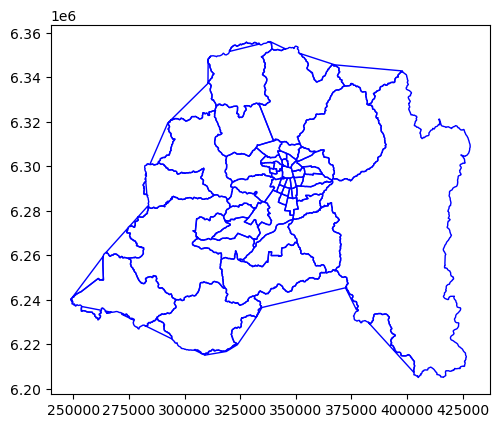

In [21]:
#Para Valparaiso, pero falta los viajes de origen destino
from pyrosm import OSM
import matplotlib.pyplot as plt

try:
    print("Attempting to open PBF file...")
    # Verifica si el archivo existe antes de intentar abrirlo
    full_path = (OSM_PATH / PBF_FILENAME).resolve()
    print("Full Path: ", full_path)
    
    # Intenta cargar el archivo OSM
    osm = OSM(str(full_path))

except ValueError:
    print("File " + str(full_path) + " not found.")

# Solo procede si osm fue definido correctamente
if osm:
    try:
        boundaries = osm.get_boundaries().to_crs("epsg:5361")
        comunas = boundaries[boundaries["admin_level"] == '8']
        # Imprimir las comunas para revisar los resultados
        print(comunas[["name", "admin_level"]])

        # Graficar todas las comunas
        ax = comunas.plot(facecolor="none", edgecolor="blue")
        plt.show()

    except Exception as e:
        print(f"An error occurred while processing the boundaries: {e}")
else:
    print("OSM file could not be loaded. Please check the file path and try again.")

<Axes: >

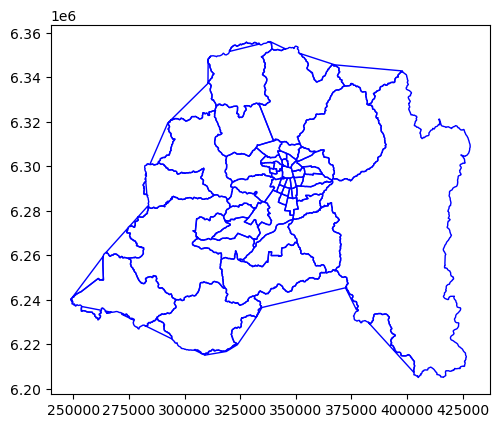

In [22]:
comunas.plot(facecolor="none", edgecolor="blue")

In [23]:
print("PBF file opened successfully!")

model_params = {
    "osm_object": osm,
    "data_crs": "epsg:4326",
    "model_crs": "epsg:5361",
    "num_commuters": mesa.visualization.Slider(
        "Number of Commuters", value=10, min_value=10, max_value=150, step=10
    ),
    "commuter_speed": mesa.visualization.Slider(
        "Commuter Walking Speed (m/s)",
        value=0.5,
        min_value=0.1,
        max_value=1.5,
        step=0.1,
    ),
}

PBF file opened successfully!


In [24]:
print("Creating Map Module...")

dgmodel = EODDemandGenerationModel("Santiago")

model = ZorZim(osm_object=osm,
data_crs="epsg:4326",
model_crs="epsg:5361",
num_commuters=1,
commuter_speed=1.4,
demand_generation_model=dgmodel)

Creating Map Module...


In [25]:
print("Simulating...")
for i in range(5):
    model.step()

Simulating...


In [26]:
print("Simulation done!")

Simulation done!


In [27]:
model.walkway.gt_graph.list_properties()

elem_id         (vertex)  (type: python::object)
x               (vertex)  (type: double)
y               (vertex)  (type: double)
edge_weight     (edge)    (type: double)


In [28]:
dgmodel.get_agent_schedule(0)

OrderedDict([(960.0, ((346539.5313, 6297890.0), (344561.0938, 6297637.5)))])